# Tree-based classification model
For binary classification problem, I personally prefer decision tree type prediction model, due to its multiple advantages, such as highly automatical learning process, exclude unimportant features, can be used in large/small datasets, and most importantly, the result is easily understand and descriptive. Starting from the simplest decision tree(cart), then try ensemble model such as random forest and boosting, after evaluating model performance, modify model with tuning parameters

### Prepare and final check the feature.csv
#### 1. Load in all_feature.csv

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [1]:
import pandas as pd
import numpy as np

In [11]:
all_feature_dd = pd.read_csv("D:/MusicFile/all_feature_dd_8823.csv", index_col = 0)
#use index_col =0, the first col will be set as row_name
#dd has device dummy variable(ar, ip, both)
#all_feature_nd = pd.read_csv("D:/MusicFile/all_feature_nd.csv", index_col = 0)
#nd has no device feature

In [12]:
print(all_feature_dd.shape)
all_feature_dd.sample(8)

(8823, 24)


freq_play_last_21_days  avg_playtime_last_21_days  \
uid                                                              
155634368.0                     NaN                        NaN   
21776440.0                      NaN                        NaN   
154380464.0                     NaN                        NaN   
167856576.0                   116.0                 105.370690   
168264272.0                    79.0                 206.025316   
154625408.0                     NaN                        NaN   
167833168.0                   114.0                  88.842105   
154712176.0                     NaN                        NaN   

             freq_play_last_14_days  avg_playtime_last_14_days  \
uid                                                              
155634368.0                     NaN                        NaN   
21776440.0                      NaN                        NaN   
154380464.0                     NaN                        NaN   
167856576.0                    83.0                  88.951807   
168264272.0                    61.0                 209.557377   
154625408.0                     NaN                        NaN   
167833168.0                    93.0                  92.247312   
154712176.0                     NaN                        NaN   

             freq_play_last_7_days  avg_playtime_last_7_days  \
uid                                                            
155634368.0                    NaN                       NaN   
21776440.0                     NaN                       NaN   
154380464.0                    NaN                       NaN   
167856576.0                   60.0                 75.050000   
168264272.0                   61.0                209.557377   
154625408.0                    NaN                       NaN   
167833168.0                   90.0                 92.400000   
154712176.0                    NaN                       NaN   

             freq_play_last_3_days  avg_playtime_last_3_days  \
uid                                                            
155634368.0                    NaN                       NaN   
21776440.0                     NaN                       NaN   
154380464.0                    NaN                       NaN   
167856576.0                   57.0                 67.456140   
168264272.0                    NaN                       NaN   
154625408.0                    NaN                       NaN   
167833168.0                    9.0                184.888889   
154712176.0                    NaN                       NaN   

             freq_play_last_1_days  avg_playtime_last_1_days    ...      \
uid                                                             ...       
155634368.0                    NaN                       NaN    ...       
21776440.0                     NaN                       NaN    ...       
154380464.0                    NaN                       NaN    ...       
167856576.0                   13.0                112.076923    ...       
168264272.0                    NaN                       NaN    ...       
154625408.0                    NaN                       NaN    ...       
167833168.0                    3.0                146.666667    ...       
154712176.0                    NaN                       NaN    ...       

             freq_search_last_1_days  freq_download_last_21_days  \
uid                                                                
155634368.0                      NaN                         NaN   
21776440.0                       NaN                         NaN   
154380464.0                      NaN                         NaN   
167856576.0                      4.0                         1.0   
168264272.0                      2.0                         NaN   
154625408.0                      NaN                         NaN   
167833168.0                     13.0                        13.0   
154712176.0                      NaN          

In [13]:
#fill NaN by 0
all_feature_dd = all_feature_dd.fillna(0)

all_feature_dd.sample(8)

freq_play_last_21_days  avg_playtime_last_21_days  \
uid                                                              
154480352.0                     0.0                   0.000000   
168195712.0                   189.0                 246.957672   
167613696.0                     0.0                   0.000000   
168497776.0                   840.0                 117.461598   
168717728.0                     0.0                   0.000000   
138553072.0                     0.0                   0.000000   
154760288.0                     0.0                   0.000000   
154619792.0                     0.0                   0.000000   

             freq_play_last_14_days  avg_playtime_last_14_days  \
uid                                                              
154480352.0                     0.0                   0.000000   
168195712.0                    11.0                 214.727273   
167613696.0                     0.0                   0.000000   
168497776.0                   751.0                 112.163160   
168717728.0                     0.0                   0.000000   
138553072.0                     0.0                   0.000000   
154760288.0                     0.0                   0.000000   
154619792.0                     0.0                   0.000000   

             freq_play_last_7_days  avg_playtime_last_7_days  \
uid                                                            
154480352.0                    0.0                  0.000000   
168195712.0                   10.0                211.100000   
167613696.0                    0.0                  0.000000   
168497776.0                  504.0                137.221296   
168717728.0                    0.0                  0.000000   
138553072.0                    0.0                  0.000000   
154760288.0                    0.0                  0.000000   
154619792.0                    0.0                  0.000000   

             freq_play_last_3_days  avg_playtime_last_3_days  \
uid                                                            
154480352.0                    0.0                  0.000000   
168195712.0                    8.0                213.125000   
167613696.0                    0.0                  0.000000   
168497776.0                  299.0                139.752508   
168717728.0                    0.0                  0.000000   
138553072.0                    0.0                  0.000000   
154760288.0                    0.0                  0.000000   
154619792.0                    0.0                  0.000000   

             freq_play_last_1_days  avg_playtime_last_1_days    ...      \
uid                                                             ...       
154480352.0                    0.0                  0.000000    ...       
168195712.0                    0.0                  0.000000    ...       
167613696.0                    0.0                  0.000000    ...       
168497776.0                   53.0                 43.358491    ...       
168717728.0                    0.0                  0.000000    ...       
138553072.0                    0.0                  0.000000    ...       
154760288.0                    0.0                  0.000000    ...       
154619792.0                    0.0                  0.000000    ...       

             freq_search_last_1_days  freq_download_last_21_days  \
uid                                                                
154480352.0                      0.0                         0.0   
168195712.0                      2.0                         0.0   
167613696.0                      0.0                         0.0   
168497776.0                     14.0                        12.0   
168717728.0                      0.0                         0.0   
138553072.0                      0.0                         0.0   
154760288.0                      0.0                         0.0   
154619792.0                      0.0          

In [14]:
#check balance of positive/negative 
label = all_feature_dd['Churn']
label.value_counts()

0.0    4465
1.0    4358
Name: Churn, dtype: int64

#### 2 SCALE
since almost feature are frequency(in the same scaler). If only use these features..no need to do scaling, but if we add device, it's better to scale. Besides, since tree based models have different principle than other algorithm like SVM..

In [ ]:
from sklearn import preprocessing

In [16]:
all_feature_dd_scale = all_feature_dd.drop(['Churn', 'device_ar', 'device_ip', 'device_both'])
scaler = preprocessing.StandardScaler().fit(all_feature_dd_scale)
feature_scaled = scaler.transform(df[features[1: ]])

SyntaxError: invalid syntax (<ipython-input-16-e5319603a529>, line 1)

### 2. Build Decision Tree model
#### 2.1 Split train/test set
first just split train/test as 75/25 for simple tree model


In [17]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, \
                            classification_report, \
                            accuracy_score, \
                            precision_score, \
                            recall_score, \
                            roc_curve, \
                            roc_auc_score, \
                        matthews_corrcoef, \
                        f1_score, \
                        auc
                        


In [18]:
from sklearn import tree

Important parameter: 

- criterion: gini/entropy
- splitter: best/random
- max_features: None(feature<50), log2, sqrt
- max_depth : 10~100
- min_samples_split/min_samples_leaf: for large datasize, increase(10w >10/5)
- min_weight_fraction_leaf: defualt = 0, if lots of NaN, or imbalanced classification, need to change
            
Decision tree visualization
- graphviz(install from [download_link](http://www.graphviz.org/)>>set environment path >> pip install graphviz >> pip install pydotplus


#### 2.2 Build Model

In [19]:
clf = tree.DecisionTreeClassifier(random_state = 1)

In [52]:
clf
#features mentioned above, such as max_depth, max_leaf_nodes, etc help prevent overfitting the model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [20]:
X = all_feature_dd.drop('Churn', axis = 1)
y = all_feature_dd['Churn']

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25, random_state = 1)

In [22]:
model = clf.fit(X_train, y_train)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [24]:
#Make prediction on training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:, 1]

#make prediction on test data
y_valid_pred = clf.predict(X_valid)
p_valid_pred = clf.predict_proba(X_valid)[:, 1]



#### 2.3 Evaluation

In [25]:
metrics_list = ['Accuracy', 'Precision', 'Recall', 'AUC', 'F1_Score']
# 'Confusion_matrix']
def get_performance_metrics(ytrain, ytrain_p, yvalid, yvalid_p):
    metrics_df = pd.DataFrame(columns = ['train', 'valid'])
    metrics_df.loc['Accuracy'] = [accuracy_score(ytrain, ytrain_p), accuracy_score(yvalid, yvalid_p)]
    metrics_df.loc['Precision'] = [precision_score(ytrain, ytrain_p), precision_score(yvalid, yvalid_p)]
    metrics_df.loc['Recall'] = [recall_score(ytrain, ytrain_p), recall_score(yvalid, yvalid_p)]
    metrics_df.loc['f1_score'] = [f1_score(ytrain, ytrain_p), f1_score(yvalid, yvalid_p)]
    metrics_df.loc['AUC'] = [roc_auc_score(ytrain, ytrain_p), roc_auc_score(yvalid, yvalid_p)]
    metrics_df.loc['Matthews_Corrcoef'] = [matthews_corrcoef(ytrain, ytrain_p), matthews_corrcoef(yvalid, yvalid_p)]
    return metrics_df

def get_confusion_matrix(y_valid, y_predict):
    cm = pd.DataFrame(confusion_matrix(y_valid, y_predict), \
                      columns = ['Predicted Active', 'Predicted Churn'], \
                      index = ['True Active', 'True Churn'])
    return cm

def plot_roc_curve(y_valid, pred_probs):
    fpr, tpr, threshold = roc_curve(y_valid, pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [26]:
#get the model preformance
get_performance_metrics(y_train, y_train_pred, y_valid, y_valid_pred)

train     valid
Accuracy           0.996524  0.922937
Precision          0.993912  0.920475
Recall             0.999082  0.923853
f1_score           0.996490  0.922161
AUC                0.996555  0.922948
Matthews_Corrcoef  0.993061  0.845866

In [27]:
#get confusion_matrix
get_confusion_matrix(y_valid, y_valid_pred)

Predicted Active  Predicted Churn
True Active              1029               87
True Churn                 83             1007

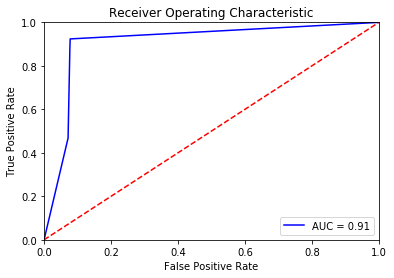

In [30]:
#get roc_curve
plot_roc_curve(y_valid, p_valid_pred)

#### 2.4 Tree Visualization

In [31]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(model, out_file = None,
                                feature_names = X.columns, \
                               filled = True, rounded = True, \
                               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#tree.export_graphviz(model.tree_, out_file='tree.dot', feature_names=X.columns)
#from subprocess import call
#call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

In [32]:
#save the DT
graph.write_pdf("D:/MusicFile/DT.pdf")

True

#### 2.5 Feature Importance

In [33]:
importance = clf.feature_importances_

In [34]:
fi_DT = pd.DataFrame(data = clf.feature_importances_, index = X.columns, columns = ['feature_importance']) 
fi_DT

feature_importance
freq_play_last_21_days                0.020870
avg_playtime_last_21_days             0.027017
freq_play_last_14_days                0.019628
avg_playtime_last_14_days             0.015965
freq_play_last_7_days                 0.008161
avg_playtime_last_7_days              0.071330
freq_play_last_3_days                 0.002048
avg_playtime_last_3_days              0.028165
freq_play_last_1_days                 0.002717
avg_playtime_last_1_days              0.002575
freq_search_last_21_days              0.005927
freq_search_last_14_days              0.714833
freq_search_last_7_days               0.005027
freq_search_last_3_days               0.000458
freq_search_last_1_days               0.044164
freq_download_last_21_days            0.005214
freq_download_last_14_days            0.005407
freq_download_last_7_days             0.002270
freq_download_last_3_days             0.007120
freq_download_last_1_days             0.007747
device_ar                             0.000974
device_both                           0.001583
device_ip                             0.000801

([<matplotlib.axis.XTick at 0x11e75df0>,
 <a list of 23 Text xticklabel objects>)

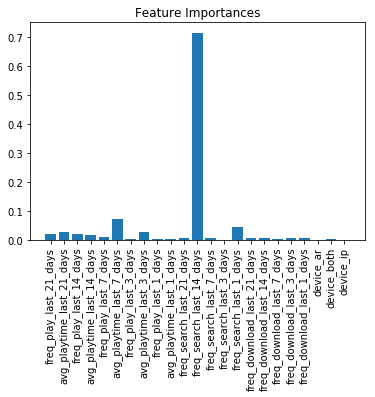

In [35]:
#plot feature importance
plt.title('Feature Importances')
plt.bar(np.arange(len(X.columns)), clf.feature_importances_)
plt.xticks(np.arange(len(X.columns)), X.columns, rotation = 'vertical')

feature_importance of DT seems awkward...
## 3. Random Forest
important parameter of bagging
- number of estimators: max # of weak learner in the forest, too small will cause underfitting, too large cause overfitting. Increase this parameter will largely reduce bias/increase accuracy but make no effort to bias/variance of each estimator
- bootstrap: sample with replacement
- oob_score = True, just like cross validation
important parameter of decision tree
- max_features/max_leaf_nodes: auto means consider sqrt(N) features when split, for feature <50, use None(consider all features): 
- max_depth/min_samples_split = None/2 only adjust(↑) when for large size

more leaf nodes or depth means(rough tuning) the bias ↓, variance ↑, min_samples_splits/min_samples_leaf(refine tuning) means the less the more complex of weak learner
- n_jobs = -1(parallel computing, -1 means same as CPU)
- random_state = 50?

method:
- predict_proba(x): give prob for each label

### 3.1 Build model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
#just random give some parameters for RF
try_forest = RandomForestClassifier(n_estimators = 100,
                max_depth = 5,
                min_samples_split = 10,
                min_samples_leaf = 5, 
                oob_score = True,
                random_state = 10)
#not need to split train/test, so put all into RF model
try_forest.fit(X, y)
y_tpp = try_forest.predict_proba(X)[:,1]
print("oob score:", try_forest.oob_score_)
print("auc score:", roc_auc_score(y, y_tpp))
#try_forest.score(X_test, y_test)

oob score: 0.9494503003513544
auc score: 0.9905414197519126


In [58]:
fi_RF = pd.DataFrame(data = try_forest.feature_importances_, index = X.columns, columns = ['feature_importance']) 
fi_RF

feature_importance
freq_play_last_21_days                0.049815
avg_playtime_last_21_days             0.020198
freq_play_last_14_days                0.101783
avg_playtime_last_14_days             0.063245
freq_play_last_7_days                 0.053034
avg_playtime_last_7_days              0.088219
freq_play_last_3_days                 0.023204
avg_playtime_last_3_days              0.015277
freq_play_last_1_days                 0.002686
avg_playtime_last_1_days              0.002109
freq_search_last_21_days              0.098217
freq_search_last_14_days              0.129950
freq_search_last_7_days               0.127858
freq_search_last_3_days               0.131078
freq_search_last_1_days               0.065273
freq_download_last_21_days            0.004349
freq_download_last_14_days            0.003550
freq_download_last_7_days             0.004155
freq_download_last_3_days             0.009158
freq_download_last_1_days             0.006345
device_ar                             0.000202
device_both                           0.000274
device_ip                             0.000021

([<matplotlib.axis.XTick at 0x11604b10>,
 <a list of 23 Text xticklabel objects>)

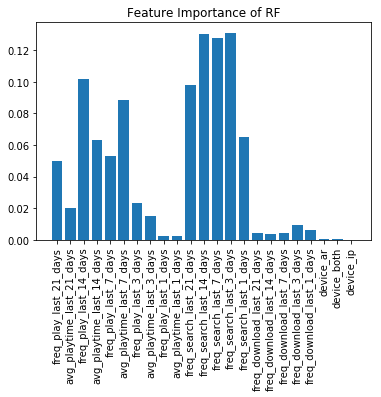

In [40]:
#plot feature importance
plt.title("Feature Importance of RF")
plt.bar(np.arange(len(X.columns)), try_forest.feature_importances_)
plt.xticks(np.arange(len(X.columns)), X.columns, rotation = 'vertical')

### 3.2 parameter tuning
the main purpose for parameter tuning is to balance variance and bias, since at first, we only have a vague idea of those parameters, we can first try **RandomSearch** to narrow down the range of parameters, then use **GridSearch** to find the best combination


In [58]:
try_forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)>

In [60]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
random_grid = {'n_estimators': np.arange(50, 500, 50, dtype = int),
             'max_depth': np.arange(10,100,10), 
             'min_samples_split': [2,5,10,20,50,100],
             'min_samples_leaf':[2,4,6,8,10,20,50]}
#before searching for the best parameter combination, have to fit data 
rfc = RandomForestClassifier(n_jobs = -1, max_features = 'sqrt', 
                             n_estimators = 50, oob_score = True)

In [62]:
random_rfc = RandomizedSearchCV(estimator = try_forest, param_distributions = random_grid,
                          cv = 3, n_iter = 50, random_state = 22, n_jobs = -1)
random_rfc.fit(X,y)


NameError: name 'report' is not defined

In [66]:
#check result
print(random_rfc.best_estimator_)
print(random_rfc.best_score_ , random_rfc.best_params_ )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=10, verbose=0, warm_start=False)
0.9152215799614644 {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_depth': 50}


In [68]:
#based on results of random search, we can now do grid search around those parameters
param_grid = {'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
              'max_depth': [20,30,40,50,60,70, 80], 
              'min_samples_split': [4,6,8,10,12,14,16,18,20],
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10]
             }
rfc_grid_search.fit(X, y)

In [ ]:

rfc_grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1)
rfc_grid_search.fit(X, y)
#grid_search.grid_score_, grid_search.best_estimator_, grid_search.best_score_

In [ ]:
#check result
print(rfc_grid_search.cv_results_)
print(rfc_grid_search.best_estimator_)
print(rfc_grid_search.best_score_ , rfc_grid_search.best_params_)

### 4. Adaboost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

Cross validation

sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None, cv=None,n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
- estimator: weak learner:svm, decision stamp,etc
- cv: cross validation method(LFold:n_splits:K; 
- scoring: algorithm for accuracy
- 

**AdaBoost**

AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)
- base_estimator : object, optional (default=DecisionTreeClassifier)
The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes.

- n_estimators : integer, optional (default=50)
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

- learning_rate : float, optional (default=1.)
Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

- algorithm : {‘SAMME’, ‘SAMME.R’}, optional (default=’SAMME.R’)
If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

- random_state : int, RandomState instance or None, optional (default=None)

**Attributes**
- estimators_: list of classifiers
- classes_: classes label
- n_classes_:
- estimator_weights_: 
- estimator_errors_: 

In [50]:
kfolds = model_selection.KFold(n_splits = 10, random_state = 7)
adaboost = AdaBoostClassifier(n_estimators = 50, random_state = 7)
aresults = model_selection.cross_val_score(adaboost, X_train, y_train, cv = kfolds)

In [56]:
adaboost.fit(X_train, y_train).predict(X_valid)

array([1., 0., 0., ..., 0., 1., 1.])

In [51]:
aresults

array([0.95468278, 0.93957704, 0.94108761, 0.95166163, 0.95468278,
       0.92900302, 0.94561934, 0.93797277, 0.93192133, 0.93040847])

In [52]:
fi_adaboost = pd.DataFrame(data = adaboost.feature_importances_, index = X.columns, columns = ['feature_importance']) 
fi_adaboost

AttributeError: 'AdaBoostClassifier' object has no attribute 'estimators_'

In [53]:
adaboost.feature_importances_

AttributeError: 'AdaBoostClassifier' object has no attribute 'estimators_'

AttributeError: 'AdaBoostClassifier' object has no attribute 'estimators_'

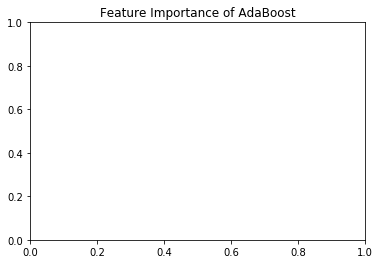

In [45]:
#plot feature importance
plt.title("Feature Importance of AdaBoost")
plt.bar(np.arange(len(X.columns)), adaboost.feature_importances_)
plt.xticks(np.arange(len(X.columns)), X.columns, rotation = 'vertical')

In [ ]:
#parameter tuning
n_estimator
learning_rate


### 5.GradientBoosting


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators = 30, random_state = 8)
gresults = model_selection.cross_val_score(gboost, X, y, cv = kfolds)

In [83]:
gresults.mean() 

0.9862870198584484